## Visualizations in python

In python there are two main packages for visualizations:
* matplotlib.pyplot
    * Quick and highly customizable plots
    * You as a user need to specify pretty much everything
    * Optimized for python lists, dictionaries and numpy objects, not so much for pandas dataframes and series
* seaborn
    * High-level plotting library
    * less customization but lots of prebuild configurations
    * easy handling of pandas objects

Seaborn is build on top of matplotlib, it is thus possible to combine both if certain features are missing.

The general concept is always the same. In code, you start by defining and customizing one plot until you show or clear it.
All function calls inbetween creating and clearing are applied to the same plot. There are exceptions but this is the general rule of thumb.

Today we will focus on `seaborn`, with some aspects also shown in matplotlib.

<Axes: xlabel='junction_length', ylabel='Count'>

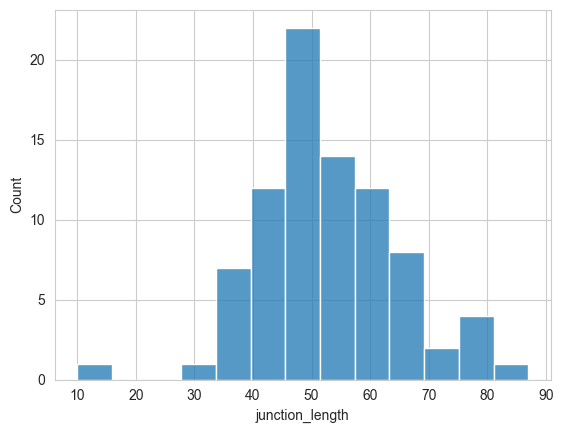

In [1]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
import pandas as pd

# import a dataset. In our case this is the vdj seq results from IMGT-VQUEST
vdj_df = pd.read_csv("datasets/vdj_seq.tsv", delimiter="\t")

# let's start with a histogram of the junction length
sns.histplot(data=vdj_df, x="junction_length")

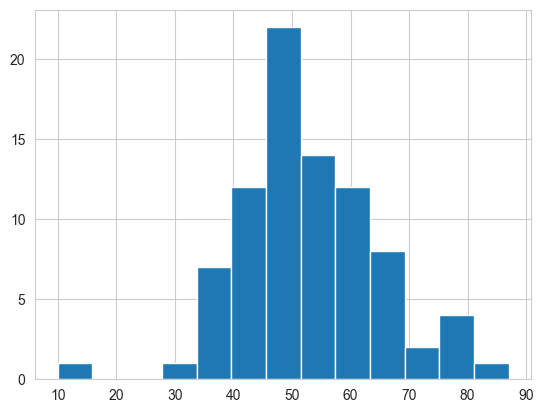

In [36]:
plt.hist(vdj_df["junction_length"], bins=13)
plt.show()

<Axes: xlabel='junction_length', ylabel='Count'>

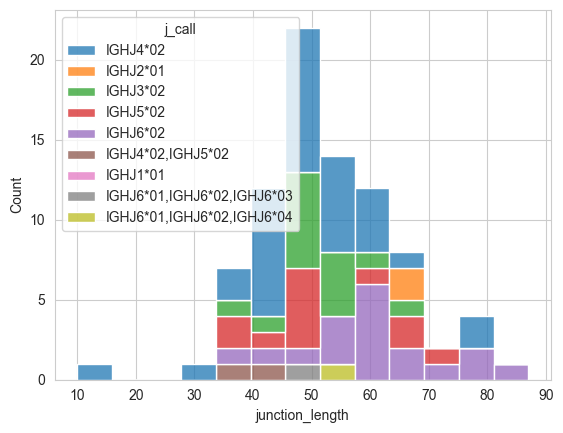

In [83]:
# we might want to add a hue based on a categorical parameter like the j-gene
sns.histplot(data=vdj_df, x="junction_length", hue="j_call", multiple="stack")

In [84]:
# the legend looks very ugly. We do only want to get the specific J-gene not the variant.
vdj_df["J gene"] = vdj_df["j_call"].str.split("*").str[0]

print(vdj_df["J gene"].head())

0    IGHJ4
1    IGHJ2
2    IGHJ3
3    IGHJ4
4    IGHJ4
Name: J gene, dtype: object


<Axes: xlabel='junction_length', ylabel='Count'>

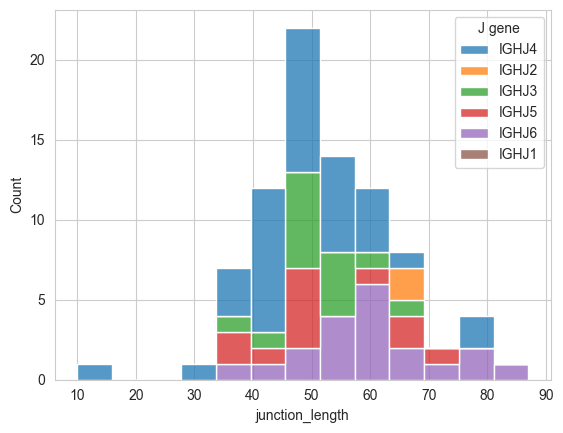

In [85]:
sns.histplot(data=vdj_df, x="junction_length", hue="J gene", multiple="stack")


<Axes: xlabel='junction_length', ylabel='Count'>

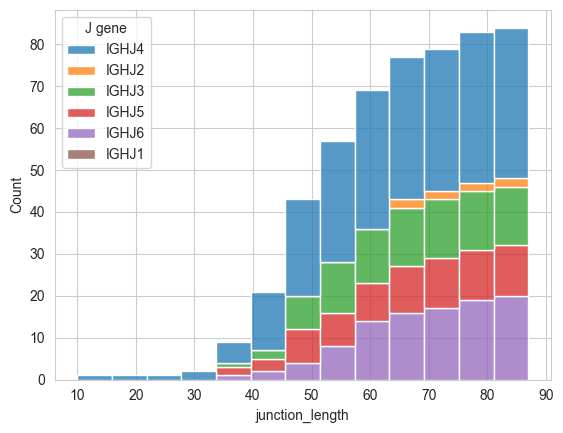

In [86]:
# maybe we want to plot the junction length cumulative, i.e. for length n we plot the cumulative amount of sequences with length <= n
sns.histplot(data=vdj_df, x="junction_length", hue="J gene", multiple="stack", cumulative=True)

### Probability distributions

The histogram plot can also be used to plot distributions of concrete data. Seaborn has built-in options to calculate probability densities and plot them.

<Axes: xlabel='junction_length', ylabel='Probability'>

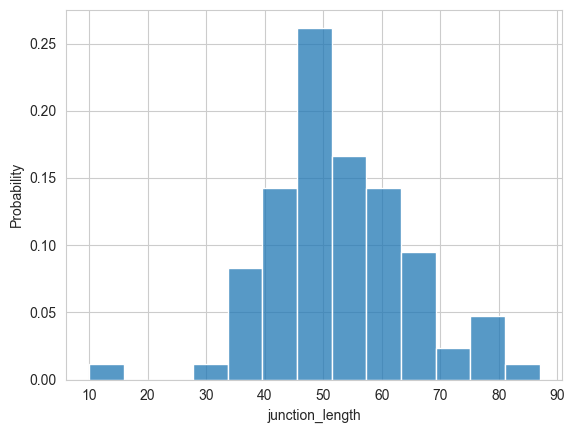

In [87]:
# this makes more sense if we do not look at the groups but just as the probability for a certain length
# first, let's plot the probability density function
sns.histplot(data=vdj_df, x="junction_length", cumulative=False, stat="probability")


<Axes: xlabel='junction_length', ylabel='Probability'>

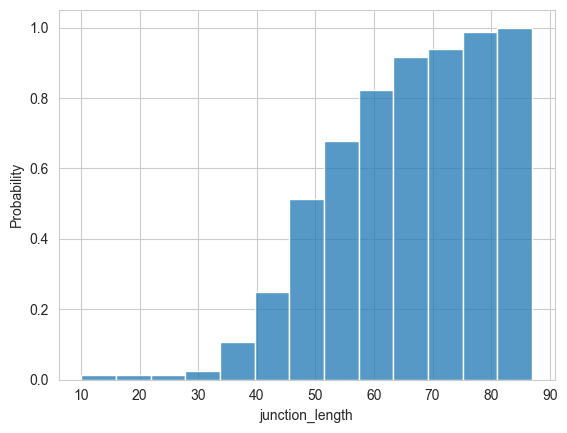

In [88]:
# next plot the cumulative density function
sns.histplot(data=vdj_df, x="junction_length", cumulative=True, stat="probability")

<Axes: xlabel='junction_length', ylabel='Probability'>

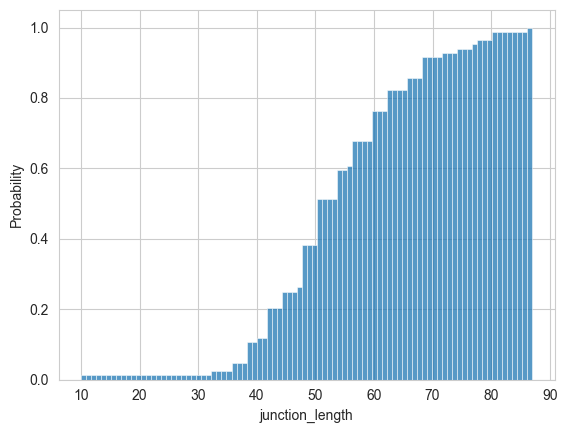

In [89]:
# currently we use the default bin-width, let's change that
sns.histplot(data=vdj_df, x="junction_length", cumulative=True, stat="probability", bins=90)

<Axes: xlabel='junction_length', ylabel='Probability'>

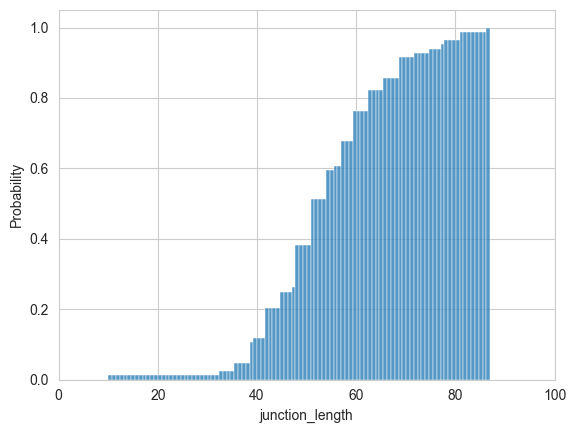

In [90]:
# We can also modify the plot after initializing it. Let's set the x range from 0 to 100
plot = sns.histplot(data=vdj_df, x="junction_length", cumulative=True, stat="probability", bins=100)
plot.set_xlim(0,100)
plot

#### Continuous data

Our junction lengths are nice and discrete, so we can use the histogram to plot their distribution nicely. But what if our data is continuous?
We can use other predefined plots for these scenarios. Let's look at our `V_identity`.

<Axes: xlabel='v_identity', ylabel='Density'>

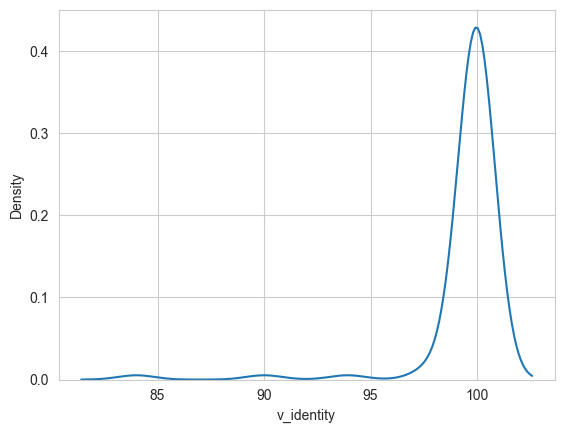

In [91]:
sns.kdeplot(data=vdj_df, x="v_identity", cumulative=False)

### Other plots

There is an unlimited number of plots and ways to visualize data. Let's look at a few more examples as well as some tips and tricks:

<Axes: xlabel='v_sequence_start', ylabel='junction_length'>

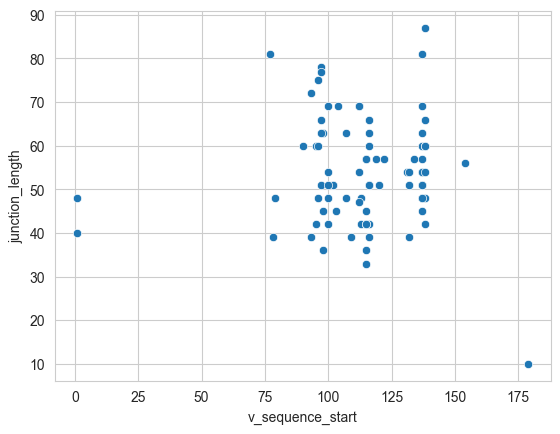

In [92]:
sns.scatterplot(data=vdj_df, x="v_sequence_start", y="junction_length")

<Axes: xlabel='v_sequence_start', ylabel='junction_length'>

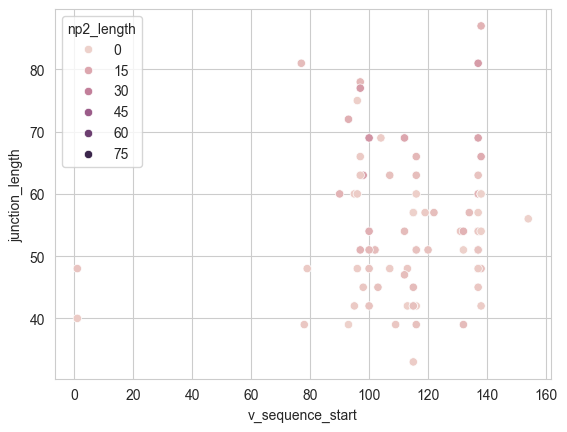

In [93]:
sns.scatterplot(data=vdj_df, x="v_sequence_start", y="junction_length", hue="np2_length")

<Axes: xlabel='v_sequence_start', ylabel='junction_length'>

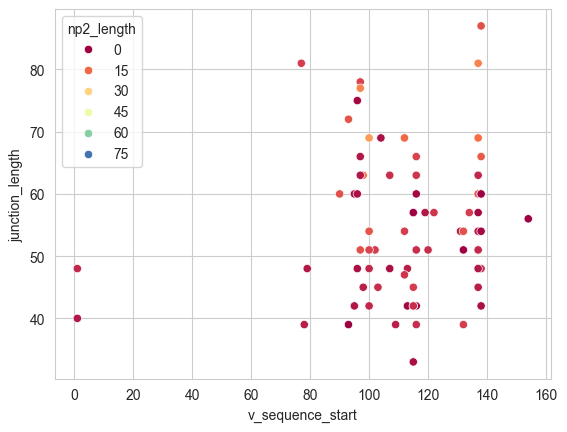

In [3]:
# the color theme above look bad, let's change the palette, (hue_norm=(0,30))
sns.scatterplot(data=vdj_df, x="v_sequence_start", y="junction_length", hue="np2_length", palette="Spectral")

Text(0.5, 1.0, 'Length of the VDJ junction compared to the start of the V sequence')

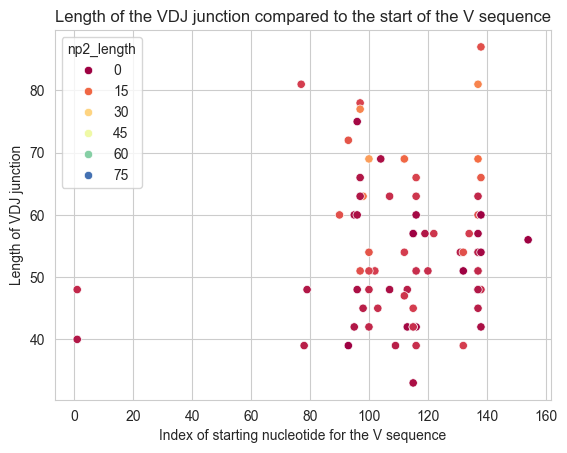

In [95]:
# let's change the x and y labels as they are a bit ugly with the underscores. We can also specify a title
nice_axis_labels = sns.scatterplot(data=vdj_df, x="v_sequence_start", y="junction_length", hue="np2_length", palette="Spectral")
nice_axis_labels.set_xlabel("Index of starting nucleotide for the V sequence")
nice_axis_labels.set_ylabel("Length of VDJ junction")
nice_axis_labels.set_title("Length of the VDJ junction compared to the start of the V sequence")

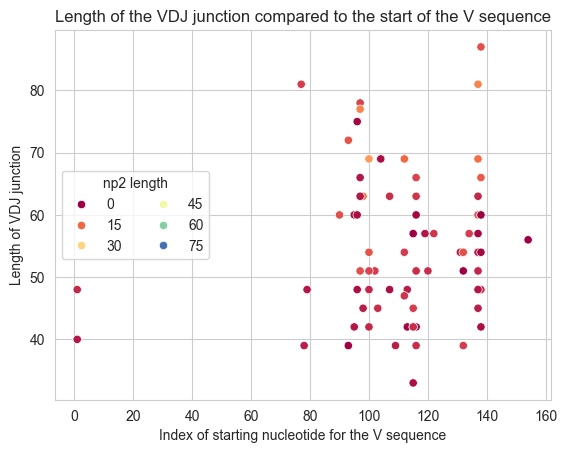

In [96]:
# the legend is still quite ugly, and we may want to change its position:
nice_legend = sns.scatterplot(data=vdj_df, x="v_sequence_start", y="junction_length", hue="np2_length", palette="Spectral")
nice_legend.set_xlabel("Index of starting nucleotide for the V sequence")
nice_legend.set_ylabel("Length of VDJ junction")
nice_legend.set_title("Length of the VDJ junction compared to the start of the V sequence")
nice_legend.legend(loc="center left", title="np2 length", ncol=2)

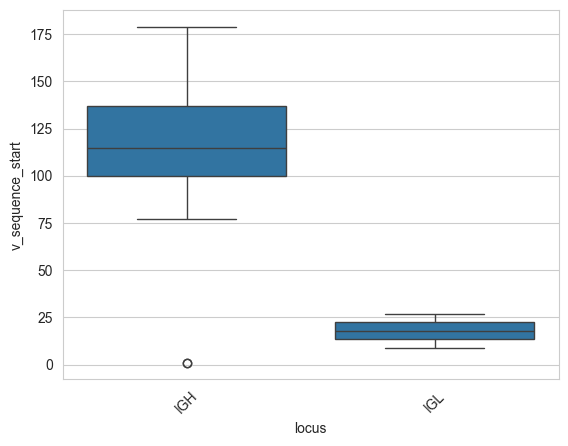

In [97]:
# when we plot our x or y ticks, we might have text on them that we need to rotate
tick_rotation = sns.boxplot(data=vdj_df, x="locus", y="v_sequence_start")
tick_rotation.set_xticks(ticks=[0,1], labels=["IGH", "IGL"], rotation=45)

### Advanced plots

Apart from scatter-, bar- or boxplots, there are also advanced plots like heatmaps.
Let's look at an example here as well.


[Text(0.5, 0, 'V'), Text(1.5, 0, 'D'), Text(2.5, 0, 'J')]

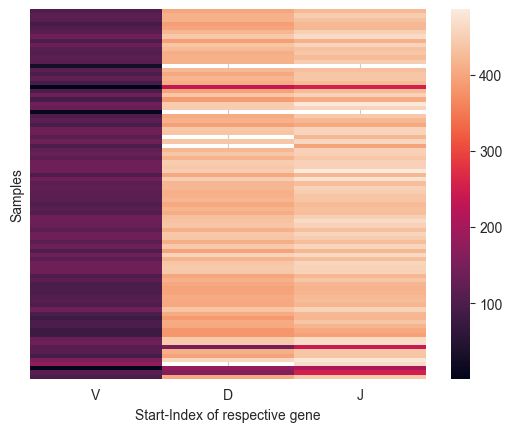

In [98]:
heatmap = sns.heatmap(data=vdj_df[["v_sequence_start", "d_sequence_start", "j_sequence_start"]], yticklabels=False)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Start-Index of respective gene")
heatmap.set_xticklabels(["V", "D", "J"])

[Text(0.5, 0, 'np1'), Text(1.5, 0, 'np2')]

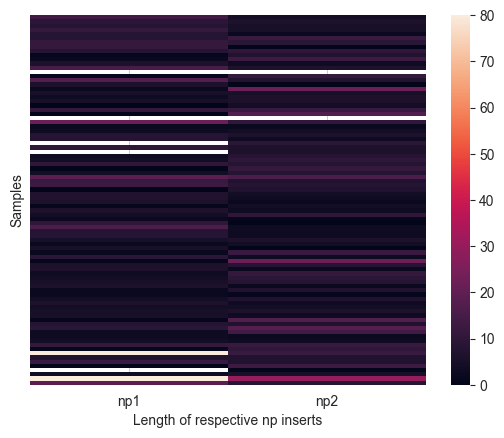

In [99]:
heatmap = sns.heatmap(data=vdj_df[["np2_length", "np1_length"]], yticklabels=False)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Length of respective np inserts")
heatmap.set_xticklabels(["np1", "np2"])

[Text(0.5, 0, 'np1'), Text(1.5, 0, 'np2')]

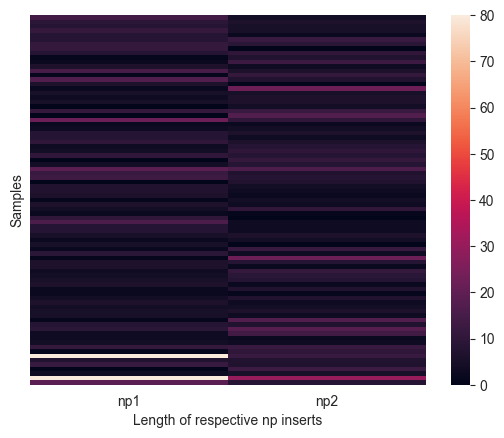

In [100]:
# we do see some weird artifacts (white bars), let's exclude NaN values
heatmap = sns.heatmap(data=vdj_df.loc[~(vdj_df["np2_length"].isna() | vdj_df["np1_length"].isna()), ["np2_length", "np1_length"]], yticklabels=False)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Length of respective np inserts")
heatmap.set_xticklabels(["np1", "np2"])

[Text(0.5, 0, 'np1'), Text(1.5, 0, 'np2')]

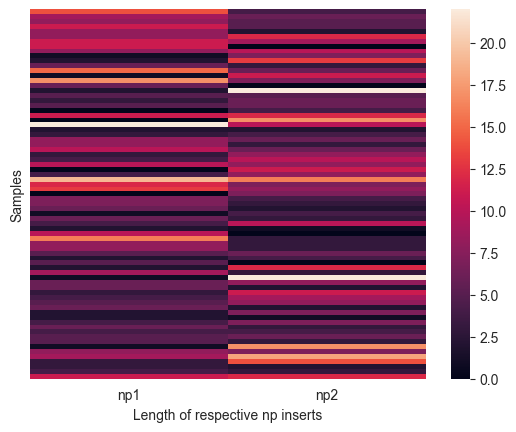

In [101]:
# there are still two artifacts -> they come from two IGH samples, that are not productive and have a high np2_length (=80)
input_df = vdj_df.loc[~(vdj_df["np2_length"].isna() | vdj_df["np1_length"].isna() | (vdj_df["productive"] == "F")), ["np2_length", "np1_length"]]
heatmap = sns.heatmap(data=input_df, yticklabels=False)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Length of respective np inserts")
heatmap.set_xticklabels(["np1", "np2"])

[Text(0.5, 0, 'np1'), Text(1.5, 0, 'np2')]

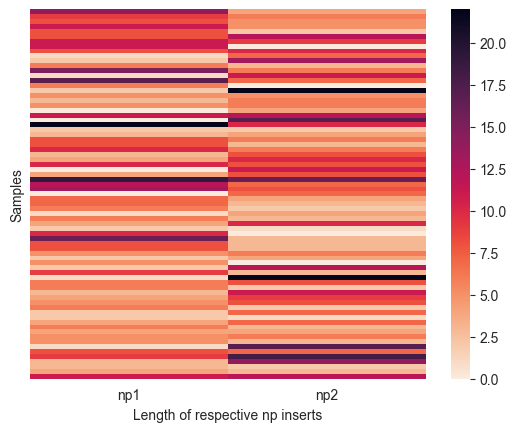

In [102]:
# we may want to reverse the colors -> small = bright
input_df = vdj_df.loc[~(vdj_df["np2_length"].isna() | vdj_df["np1_length"].isna() | (vdj_df["productive"] == "F")), ["np2_length", "np1_length"]]
heatmap = sns.heatmap(data=input_df, yticklabels=False, cmap=sns.cm.rocket_r)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Length of respective np inserts")
heatmap.set_xticklabels(["np1", "np2"])

[Text(0.5, 0, 'np1'), Text(1.5, 0, 'np2')]

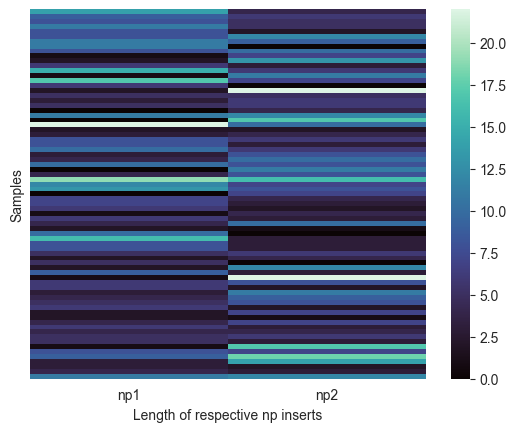

In [103]:
# we may want to use a different cmap
input_df = vdj_df.loc[~(vdj_df["np2_length"].isna() | vdj_df["np1_length"].isna() | (vdj_df["productive"] == "F")), ["np2_length", "np1_length"]]
heatmap = sns.heatmap(data=input_df, yticklabels=False, cmap=sns.cm.mako)
heatmap.set_ylabel("Samples")
heatmap.set_xlabel("Length of respective np inserts")
heatmap.set_xticklabels(["np1", "np2"])

Text(0.5, 0.95, 'My Clustermap Title')

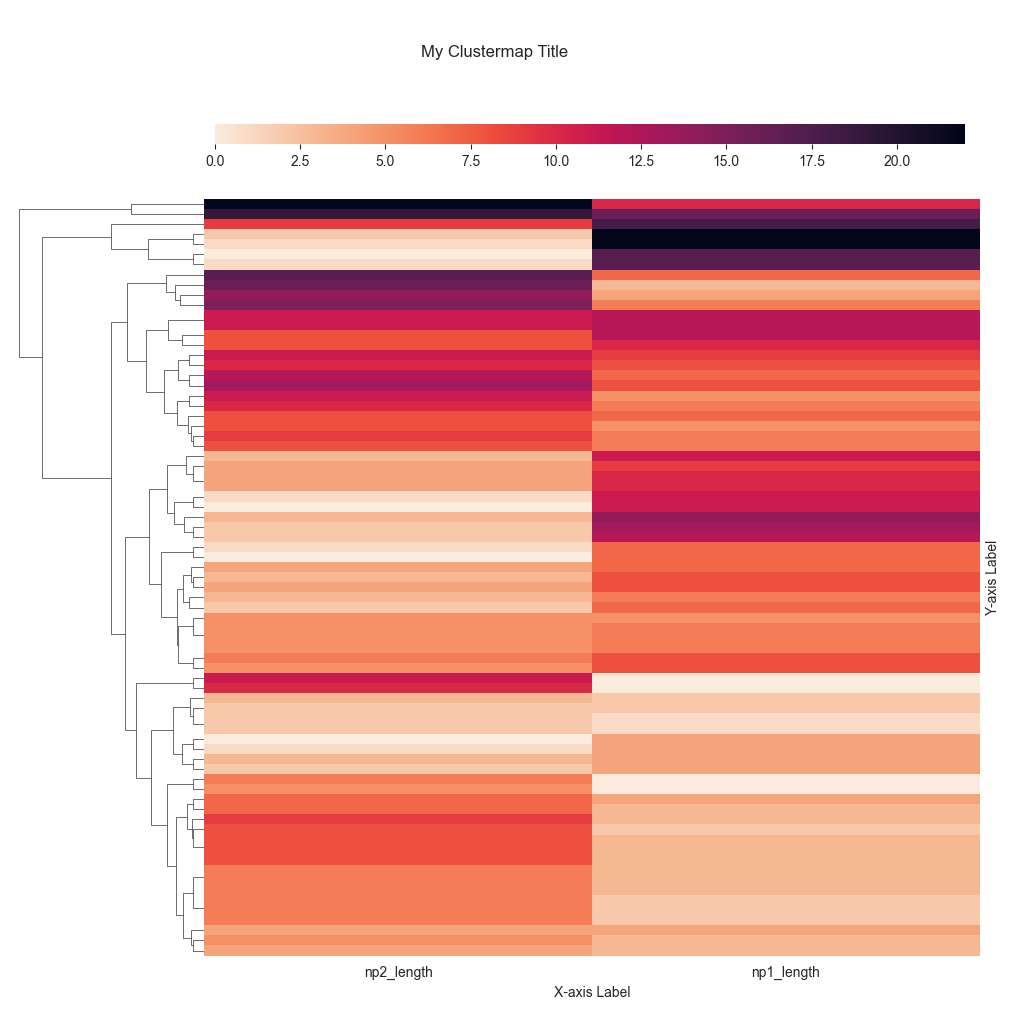

In [33]:
# we may want to reverse the colors -> small = bright
input_df = vdj_df.loc[~(vdj_df["np2_length"].isna() | vdj_df["np1_length"].isna() | (vdj_df["productive"] == "F")), ["np2_length", "np1_length"]]
heatmap = sns.clustermap(data=input_df, yticklabels=False, cmap=sns.cm.rocket_r, col_cluster=False, cbar_pos=(0.22, 0.85, 0.75, 0.02),  cbar_kws={"orientation": "horizontal"})

# Add x and y labels
heatmap.ax_heatmap.set_xlabel("X-axis Label")
heatmap.ax_heatmap.set_ylabel("Y-axis Label")

# Add a title to the entire figure
heatmap.fig.suptitle("My Clustermap Title", y=0.95)

# Adjustments to the spacing
# heatmap.fig.subplots_adjust(top=0.85)
# heatmap.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the title
# cbar_pos=(0.5, 0.8, 0.02, 0.1)  # Adjust y and height to move it closer